## Лабораторная работа №4 Морфология
#### Предмет: Методы интеллектуального анализа текстов
#### Студент: Леонова Алина, СБ № 1032212306, НФИмд-01-21

# 4. Морфология

## 4.4.	Визуализировать на двумерном графике 100 word2vec-токенов (нужно указывать часть речи) из новостных текстов с помощью алгоритма t-SNE.


### Импортирование данных

In [1]:
! wget -q https://www.dropbox.com/s/ug0b4pvuynwj4pe/news_science.zip && unzip news_science.zip

Archive:  news_science.zip
replace news_science/news1_txt/news1_1.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
import glob
import pandas as pd
from tqdm import tqdm


data = []
for path in glob.glob('./news_science/*'):
  texts = []
  for filename in tqdm(glob.glob(path + '/*news*.txt')):  # достаю только новостные
    texts.append(open(filename, 'r').read().strip())
  
  data.append(pd.DataFrame({'text': texts}))

data = pd.concat(data)
data[:3]

100%|██████████| 79/79 [00:00<00:00, 9175.87it/s]
0it [00:00, ?it/s]


,text
0,Археологи Института Востока Чикагского универс...
1,Африка в последние недели не исчезает из фокус...
2,Президент России Владимир Путин пообещал обесп...


### Предобработка (токенизация, очищение от стоп-слов, лемматизация, нахождение части речи)

In [3]:
! pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import nltk
import string, re
import pymorphy2

from collections import Counter, OrderedDict
from nltk.tokenize import RegexpTokenizer

morph = pymorphy2.MorphAnalyzer()
tokenizer = RegexpTokenizer('\W+', gaps=True)
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('russian')

data['text_tokenized'] = data.text.map(lambda row: tokenizer.tokenize(row.lower()))
def clean_rus(tokens):
    tokens = [token for token in tokens if re.match(r'[а-яА-Я]', token) and token not in stopwords]
    return tokens

print('Слова, не найденные в pymorphy2:')
morph_tokens = Counter()
for row in data.text_tokenized.map(clean_rus):
    for t in row:
        p = morph.parse(t)[0]
        if p.tag.POS:
            # склеивание нормальной формы слова с его частью речи
            morph_tokens[p.normal_form + '_' + p.tag.POS] += 1
        else:
            print(t)

top_tokens = list()
for t,f in morph_tokens.most_common():
    top_tokens.append(t)

#top_tokens


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Слова, не найденные в pymorphy2:
скс
сс
сommons
сс
сс
сс
сreative
сommоns
сс
сс
сс
унн
х
х
дкб
х
ооп
имо
х
рсв
нью
ю
х
дсб
ных
дсб
ру
дэб
лос
кфс
кфс
кфс
мфв
спз
нью
х
рэб
х
й
тэв
тэв
х
аес
нью
аес
х
х
юго
й
й
й
т9
нью
нфл
фг
нью
тсн
м1
нью
м1
ру
ру
хх
х
х
х
й
ввц
ын
гык
гын
гык
гко
ын
гык
гко
гык
ру
гык
гык
гык
гык
хуп
гык
гык
х
гко
гык
й
ына
й
пмж
кпу
маб
хфу
хфу


Сюда попали абривиатуры, английские слова и шумы

### Загрузка и импорт word2vec модели, найденной на RusVectores

In [5]:
! wget -q http://vectors.nlpl.eu/repository/20/182.zip && unzip 182.zip

^C


In [6]:
! pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import wget
import gensim
import zipfile
model_url = 'http://vectors.nlpl.eu/repository/20/182.zip'
m = wget.download(model_url)
model_file = model_url.split('/')[-1]
with zipfile.ZipFile(model_file, 'r') as archive:
    stream = archive.open('model.bin')
    model = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=True)

### Создание и отрисовка t-SNE модели

Слова, не найденные в word2vec модели:
который_ADJF
это_PRCL
свой_ADJF
такой_ADJF
также_PRCL
новый_ADJF
должный_ADJS
однако_CONJ
самый_ADJF
один_ADJF
этот_ADJF
другой_ADJF
первый_ADJF
тот_ADJF
российский_ADJF
политический_ADJF
последний_ADJF
сам_ADJF
некоторый_ADJF
весь_ADJF
хамас_NOUN
пока_ADVB
например_CONJ
международный_ADJF
косово_NOUN
больший_ADJF
какой_ADJF
около_PREP
два_NUMR
наш_ADJF
американский_ADJF
абхазия_NOUN
ещё_ADVB
несколько_ADVB
всё_PRCL
экономический_ADJF
несмотря_PREP
любой_ADJF
обама_NOUN
каждый_ADJF
хотя_CONJ
финансовый_ADJF
известный_ADJF
очень_ADVB
глобальный_ADJF
подобный_ADJF
лишь_PRCL
военный_ADJF
общественный_ADJF
большой_ADJF
израиль_NOUN
общий_ADJF
грузинский_ADJF
заключить_PRTF
ранее_ADVB
поскольку_CONJ
национальный_ADJF
высокий_ADJF
себя_NPRO
среди_PREP
сегодня_ADVB
главный_ADJF
кроме_PREP
именно_PRCL
либо_CONJ
советский_ADJF


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


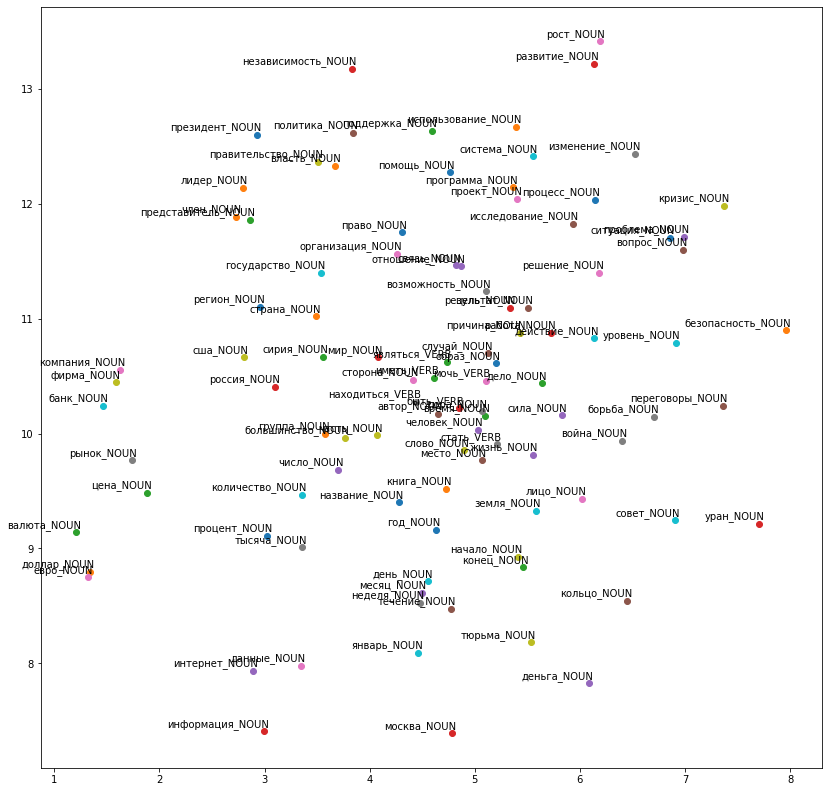

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline


def tsne_plot(model, top_tokens, max_count):
    labels = []
    tokens = []

    # нахожу нужное количество самых частотных, которые известны моделе, неизвестные пропускаю
    print('Слова, не найденные в word2vec модели:')
    count = 0
    for token in top_tokens:
        if token in model:
            tokens.append(model[token])
            labels.append(token)
            count += 1
            if count == max_count:
                break
        else:
            print(token)
    
    # уменьшение разверности с помощью t-SNE
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    # визуализация
    plt.figure(figsize=(14, 14)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


tsne_plot(model, top_tokens, 100)